## Generating Wordcloud

In [1]:
# import os
# from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS

https://amueller.github.io/word_cloud/index.html

Let's take a simple text for this demonstration

In [2]:
zen = """Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!"""

In [3]:
print(zen)

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [4]:
print("Number of words in the text: ", len(zen.split()))

Number of words in the text:  137


Split the text into words

In [5]:
zen_split_words = [word for word in zen.split()]

In [6]:
print("First 5 words: ", zen_split_words[0:5])
print("Number of words in the text after splitting: ", len(zen_split_words))

First 5 words:  ['Beautiful', 'is', 'better', 'than', 'ugly.']
Number of words in the text after splitting:  137


### 2 Way to generate wordclouds

1. Wordcloud from Natural text
2. Wordcloud from word Frequencies

### Wordcloud from Natural text

This method takes the natural text as is. It is not required to convert the text into work tokens

In [7]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    normalize_plurals=True,
    relative_scaling = 0,
    collocations = True,
    random_state = 43).generate(str(zen))

# Note that the relative_scaling is set to 0 so that the word ranking is only used instead of word frequencies 
# as well for the size of the word.
# relative_scaling of about 0.5 will start giving the wordcloud which may be similar to wrodcloud from frequencies

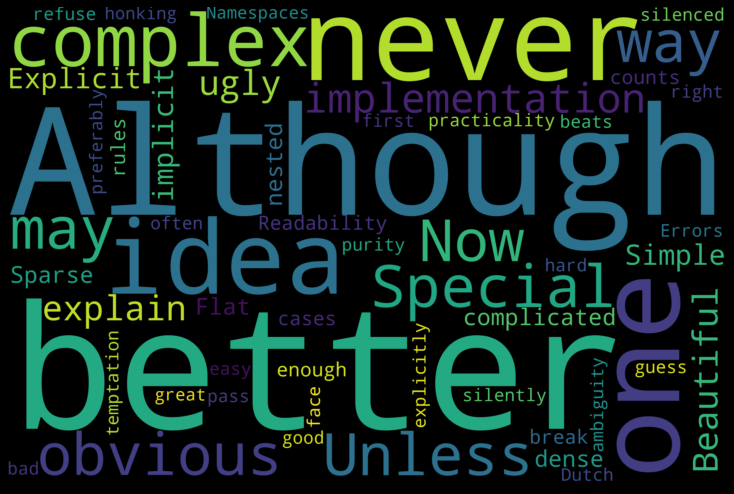

In [8]:
fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

### Wordcloud from Frequencies

This method takes input as the word and frequency in the form of a dictionay with words as keys and frequency of the word as values.

However, note that we need to split the text into word otherwise the wordcloud is generated for all the letters in the text.

In [9]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    normalize_plurals=True,
    relative_scaling = 0.7,
    collocations = False).generate_from_frequencies(FreqDist(zen_split_words))

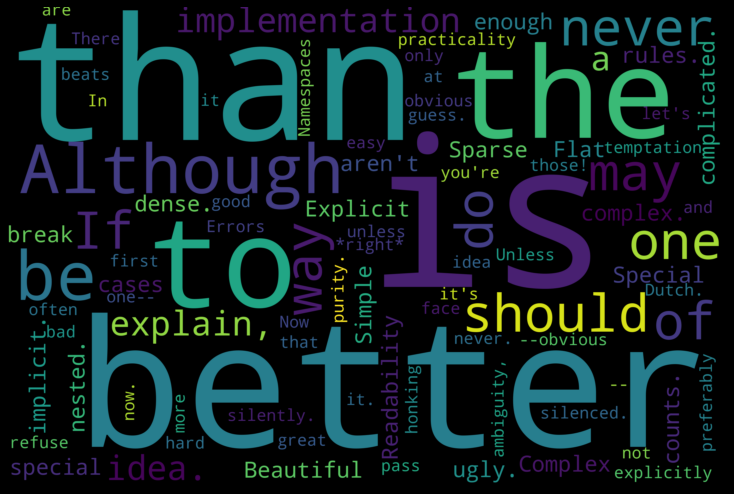

In [10]:
fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [11]:
FreqDist(zen_split_words)

FreqDist({'is': 10, 'better': 8, 'than': 8, 'to': 5, 'the': 5, 'Although': 3, 'be': 3, 'should': 2, 'never': 2, 'of': 2, ...})

From the above wordcloud and the frequency distribution we can see that the size of the words in the wordcloud is proportional to the word occurence. It is simple to interpret and validate this type of wordcloud

### Stopwords

Stopwords are word which are common words which are not much value in the wordclouds. Examples of word stopwords are 1, me, he, her, if, the etc.
There are several versions of stopwords installed along with the NLTK corpa. If we want something specific to a domain, we can build the stopwords as well.
Let's see how the wordcloud changes when the stopwords are removed form the text.

We can remove the stopwords from the text as a separate step or just include the stopwords in the wordcloud generator.
The wordcloud generator has it's own stopwords coming from the package or we can even supply the stopwords from NLTK

In [12]:
def remove_punc_stopword(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    remove_punc = [word for word in text if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word.lower() for word in remove_punc.split() if word.lower() not in stopwords.words('english')]

In [13]:
zen_no_punct_no_stopwords = remove_punc_stopword(zen)

In [14]:
print(zen_no_punct_no_stopwords)

['beautiful', 'better', 'ugly', 'explicit', 'better', 'implicit', 'simple', 'better', 'complex', 'complex', 'better', 'complicated', 'flat', 'better', 'nested', 'sparse', 'better', 'dense', 'readability', 'counts', 'special', 'cases', 'arent', 'special', 'enough', 'break', 'rules', 'although', 'practicality', 'beats', 'purity', 'errors', 'never', 'pass', 'silently', 'unless', 'explicitly', 'silenced', 'face', 'ambiguity', 'refuse', 'temptation', 'guess', 'one', 'preferably', 'one', 'obvious', 'way', 'although', 'way', 'may', 'obvious', 'first', 'unless', 'youre', 'dutch', 'better', 'never', 'although', 'never', 'often', 'better', 'right', 'implementation', 'hard', 'explain', 'bad', 'idea', 'implementation', 'easy', 'explain', 'may', 'good', 'idea', 'namespaces', 'one', 'honking', 'great', 'idea', 'lets']


In [15]:
print("First 5 words after removing stopwords: ", zen_no_punct_no_stopwords[0:5])
print("Number of words in the text after removing stopwords: ", len(zen_no_punct_no_stopwords))

First 5 words after removing stopwords:  ['beautiful', 'better', 'ugly', 'explicit', 'better']
Number of words in the text after removing stopwords:  80


### Wordcloud with natural text after removing stopwords

As we know that the above functions returns words but we need to convert the words into natural text by joining them

In [16]:
zen_no_punct_no_stopwords_joined = ' '.join(zen_no_punct_no_stopwords)
print(zen_no_punct_no_stopwords_joined)

beautiful better ugly explicit better implicit simple better complex complex better complicated flat better nested sparse better dense readability counts special cases arent special enough break rules although practicality beats purity errors never pass silently unless explicitly silenced face ambiguity refuse temptation guess one preferably one obvious way although way may obvious first unless youre dutch better never although never often better right implementation hard explain bad idea implementation easy explain may good idea namespaces one honking great idea lets


In [17]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    normalize_plurals=True,
    relative_scaling = 0,
    collocations = True,
    random_state = 43,
    stopwords = stopwords.words('english')).generate(str(zen_no_punct_no_stopwords_joined))

# Note that the relative_scaling is set to 0 so that the word ranking is only used instead of word frequencies 
# as well for the size of the word.
# relative_scaling of about 0.5 will start giving the wordcloud which may be similar to wrodcloud from frequencies

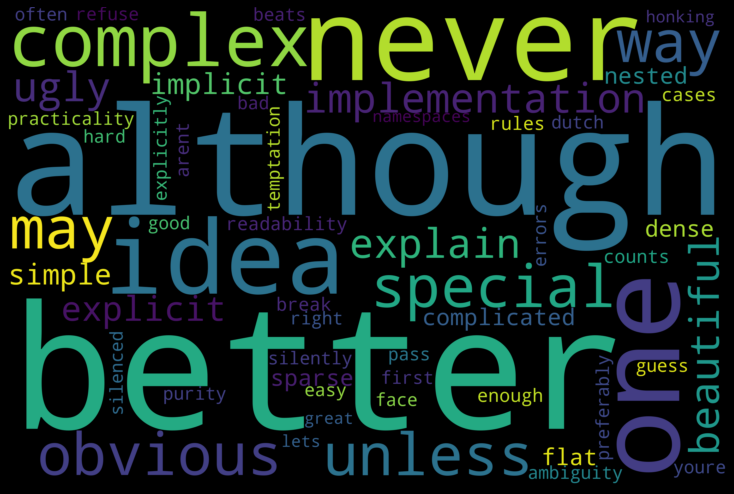

In [18]:
fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

### Wordcloud from Frequencies after removing stopwords

In [19]:
# Wordcloud from frequencies
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    normalize_plurals=True,
    relative_scaling = 0.7,
    collocations = False,
    stopwords = stopwords.words('english')).generate_from_frequencies(FreqDist(zen_no_punct_no_stopwords))

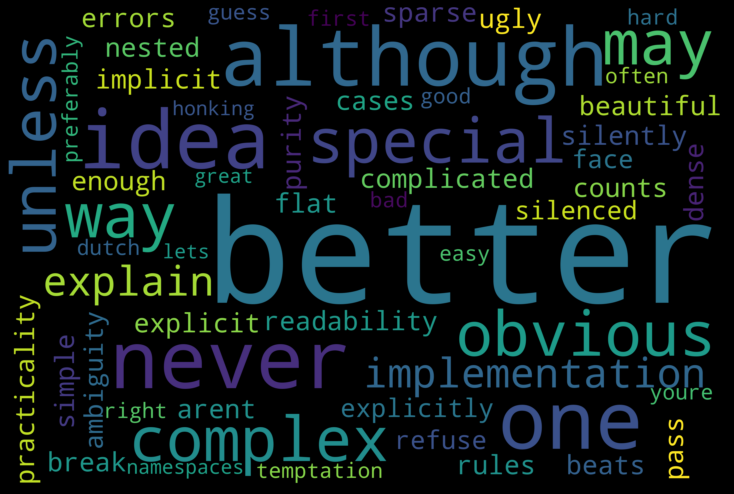

In [20]:
fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

In [21]:
FreqDist(zen_no_punct_no_stopwords)

FreqDist({'better': 8, 'although': 3, 'never': 3, 'one': 3, 'idea': 3, 'complex': 2, 'special': 2, 'unless': 2, 'obvious': 2, 'way': 2, ...})

As a next step we can create an image mask and apply the word cloud onto it